In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

def terminal_velocity_cluster(acceleration, velocity, position, time):
    index_range = []

    # Restricting the index range to the middle, discounting the start and end
    for x in velocity:
        if x > 0.3*sorted(velocity)[-1]:
            index_range.append(velocity.index(x))

    # Now imposing the restriced index range we just created, the acceleration is sorted according to the magnitudes
    sorted_acceleration = sorted(acceleration[index_range[0]:index_range[-1]], key = lambda x: abs(x))

    # Replacing the acceleration values with their respective index
    w = 0
    while w < len(sorted_acceleration):
         sorted_acceleration[w] = acceleration.index(sorted_acceleration[w])
         w += 1
    # Now to find the points in the data for which the acceleration is approximately zero
    j = 0
    k = int(0.1*len(sorted_acceleration))
    a = 1
    b = 1
    local_velocity_index = temp = []
    for x in sorted_acceleration[j:]:
        while abs(velocity[x+1] - velocity[(x+a)+1]) < 0.01*velocity[x+1]:
            local_velocity_index.append((x+a)+1)
            a += 1
        a = 0
        while abs(velocity[x+1] - velocity[(x-b)+1]) < 0.01*velocity[x+1]:
            local_velocity_index.append((x-b)+1)
            b += 1
        b = 0
        
        #Store the greatest array
        if j == 0: temp = local_velocity_index
        #record how many entries caught in a temp array to have the biggest cluster of values
        if j > 0 and len(local_velocity_index) > len(temp):
            temp = local_velocity_index
        local_velocity_index = []
        j += 1
    terminal_velocities = []
    for x in temp:
        terminal_velocities.append(velocity[x])
    return terminal_velocities

def derivative(top, bot):
    variable = top #the y in dy/dx
    time = bot #the y in dy/dx
    output_array = []
    i = 0
    while i < min(len(variable), len(time)) - 1:
        numerator = float(variable[i+1]) - float(variable[i]) #finding the gradient
        denominator = float(time[i+1]) - float(time[i])
        quotient = numerator / denominator
        output_array.append(quotient) #adding the values to the output array
        i += 1
    return output_array

def average(lst):
    total = 0
    num = 0
    for x in lst:
        total += x
        num += 1
    if num > 0:
        return total / num
    else:
        return None

def individual_SEM(position, time):
    velocity = derivative(position, time)
    acceleration = derivative(velocity, time)
    tv = terminal_velocity_cluster(acceleration, velocity, position, time)
    return np.std(tv)/(len(tv))**0.5

def v_terminal_values(position, time):
    velocity = derivative(position, time)
    acceleration = derivative(velocity, time)
    terminal_velocities = terminal_velocity_cluster(acceleration, velocity, position, time)
    temp = terminal_velocities
    temp_index = []
    for x in sorted(terminal_velocities):
        temp_index.append(velocity.index(x))
    return average(temp)
    
def average_terminal_velocity(position, time, num_of_gliders, trial_num):
    plt.rcParams['figure.figsize'] = [12, 3]
    velocity = derivative(position, time)
    acceleration = derivative(velocity, time)
    terminal_velocities = terminal_velocity_cluster(acceleration, velocity, position, time)
    temp = terminal_velocities
    temp_index = []
    for x in sorted(terminal_velocities):
        temp_index.append(velocity.index(x))
        
    fig=plt.figure()
    ax=fig.add_axes([0,0,1,1])
    #vertical lines
    plt.axvline(x=time[temp_index[0]+1], color='r')
    plt.axvline(x=time[temp_index[-1]+1], color='r')
    #horizontal line
    plt.axhline(y=v_terminal_values(position, time), color='b')
    #the graph
    ax.plot(time[1:], velocity, color='k')
    ax.set_title('{} glider/s drop: Trial No. {}'.format(num_of_gliders, trial_num))
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Velocity (m/s)')
    plt.show()
    return 'The terminal velocity is {:.3g}±{:.3g}m/s'.format(v_terminal_values(position, time), individual_SEM(position, time))

def directory_to_array(variable):
    file_directory = ['one_glider/', 'two_glider/', 'four_glider/', 'eight_glider/', 'sixteen_glider/']
    numof_gliders = [1, 2, 4, 8, 16]
    ls = [[], [], [], [], []]
    temp = [0, 0, 0, 0, 0]
    for b in range(1,6):
        a = file_directory[b-1]
        for c in range(5):
            temp[c] = ('{}{}_{}g_{}.txt'.format(a, variable, numof_gliders[b-1], c+1))
        ls[b-1] = temp
        temp = [0, 0, 0, 0, 0]
    for x in ls:
        for c in range(5):
            x[c] = format_txt(x[c])
    return ls

def format_txt(file_name):
    file = open(file_name, 'r')
    array = []
    while True:
        line = file.readline()
        if line == '':
            break
        array.append(line.replace('\n', ''))
    file.close()
    array = [float(x) for x in array]
    return array

# Data Analysis

In [2]:
time = directory_to_array('time')
position = directory_to_array('position')

### 1 glider data analysis

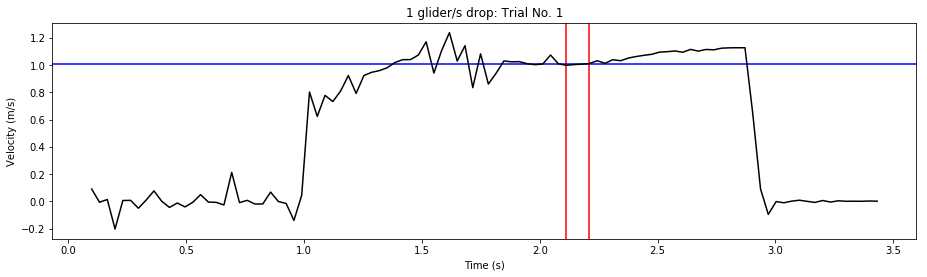

The terminal velocity is 1.01±0.00175m/s


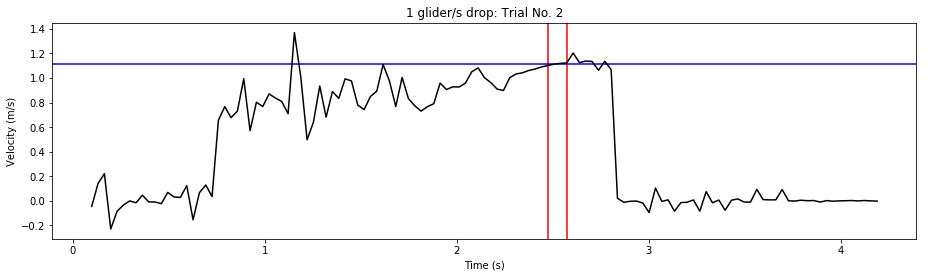

The terminal velocity is 1.11±0.00323m/s


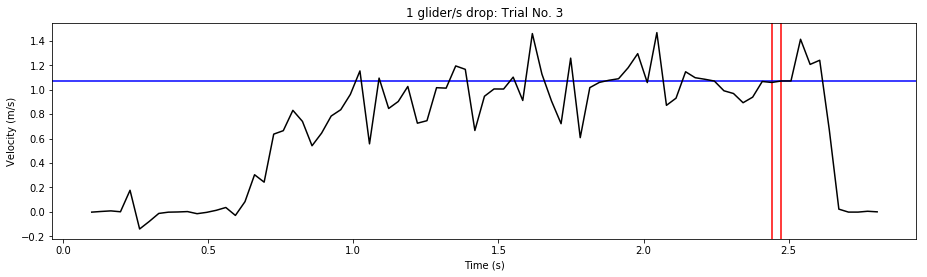

The terminal velocity is 1.07±0.00196m/s


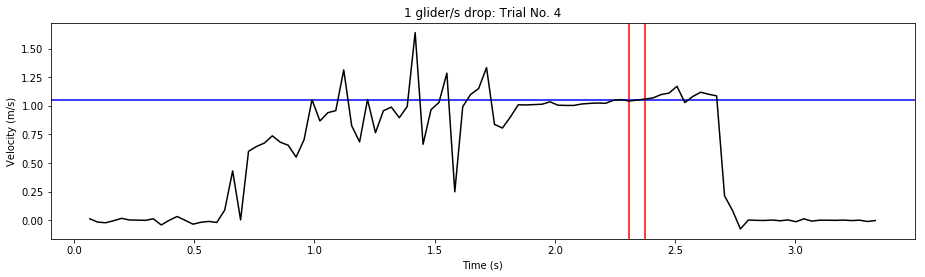

The terminal velocity is 1.05±0.00218m/s


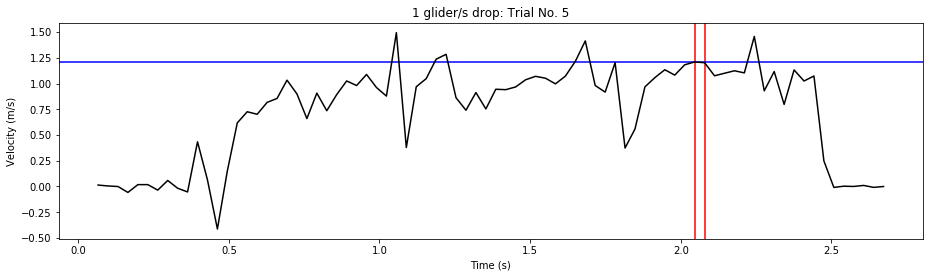

The terminal velocity is 1.2±0.002m/s


In [3]:
for a in range(5): print(average_terminal_velocity(position[0][a], time[0][a], 1, a+1))

### 2 gliders data analysis

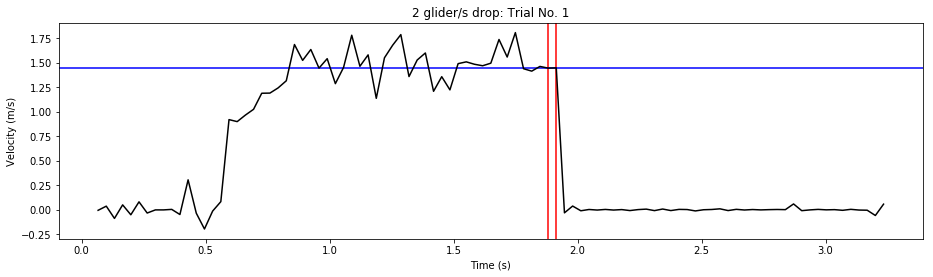

The terminal velocity is 1.45±0.000577m/s


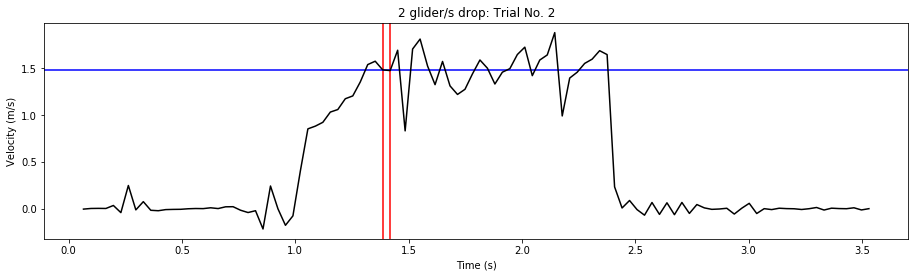

The terminal velocity is 1.48±0.002m/s


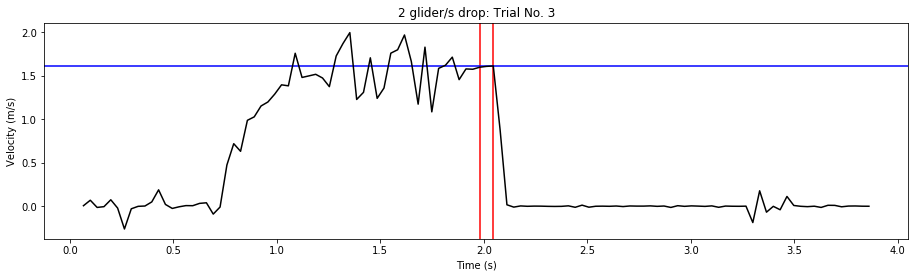

The terminal velocity is 1.61±0.003m/s


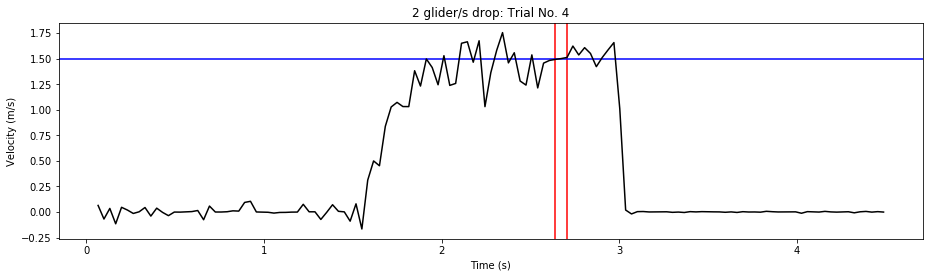

The terminal velocity is 1.5±0.00335m/s


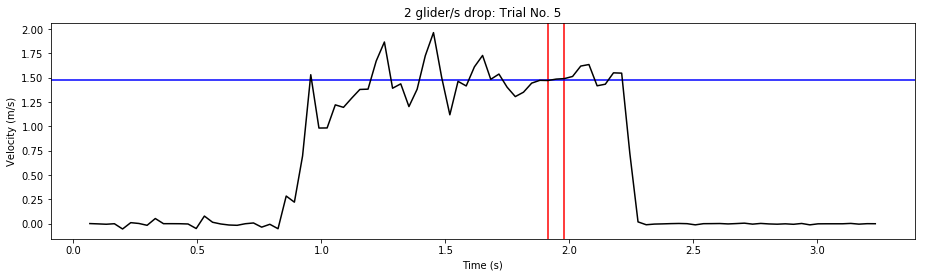

The terminal velocity is 1.48±0.00343m/s


In [4]:
for a in range(5): print(average_terminal_velocity(position[1][a], time[1][a], 2, a+1))

### 4 gliders data analysis

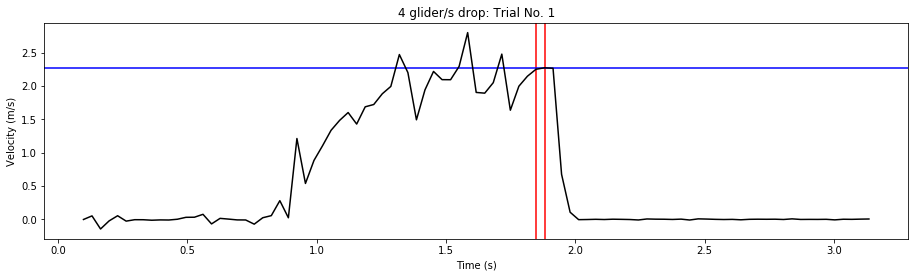

The terminal velocity is 2.26±0.00403m/s


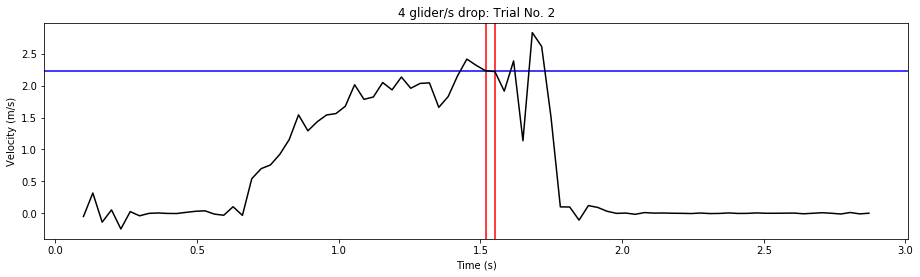

The terminal velocity is 2.23±0.00342m/s


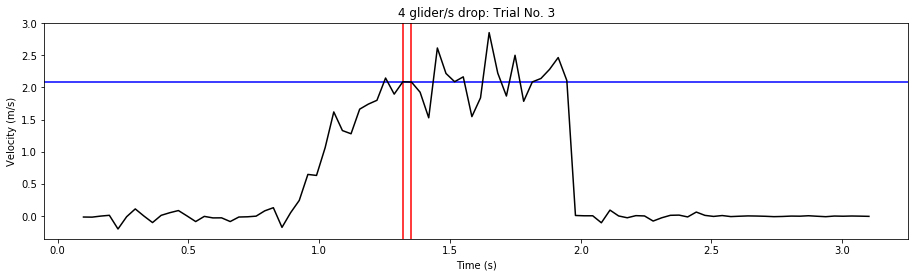

The terminal velocity is 2.09±0.00114m/s


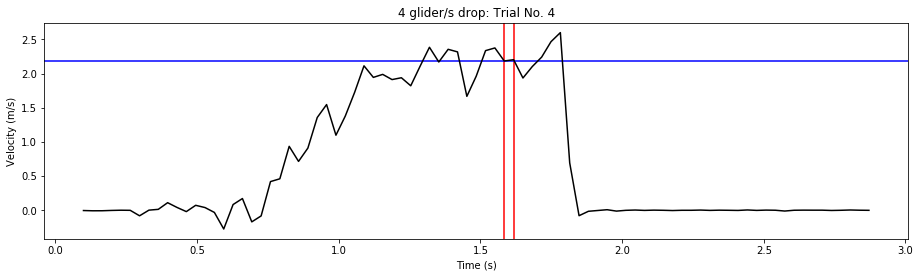

The terminal velocity is 2.19±0.00514m/s


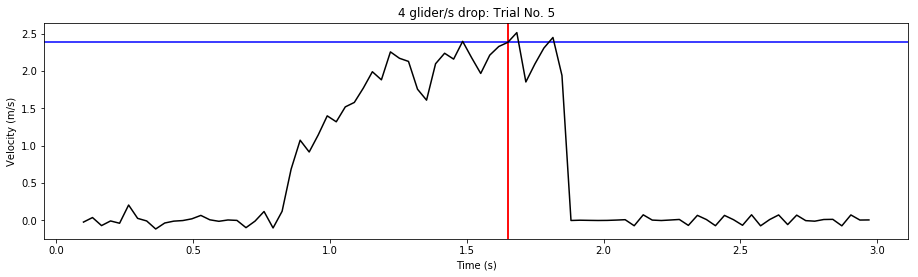

The terminal velocity is 2.38±0m/s


In [5]:
for a in range(5): print(average_terminal_velocity(position[2][a], time[2][a], 4, a+1))

### 8 gliders data analysis

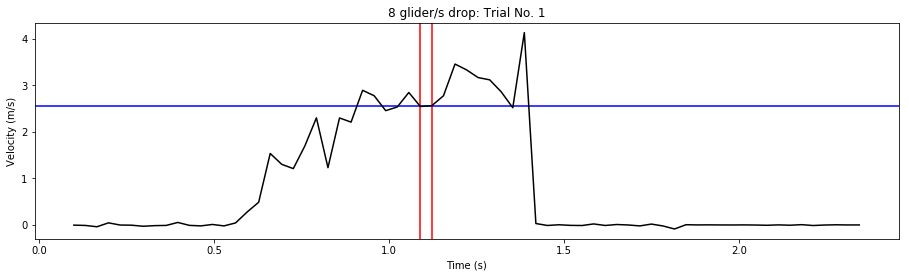

The terminal velocity is 2.55±0.00528m/s


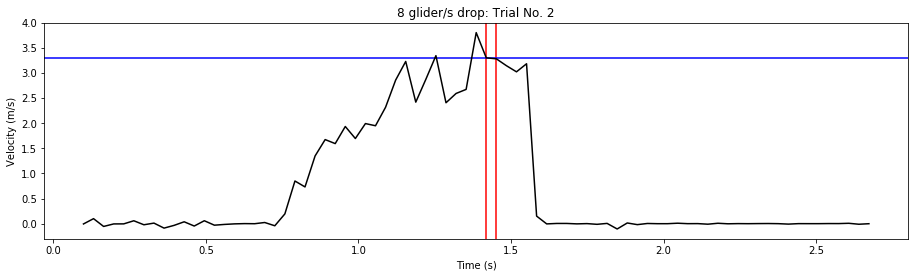

The terminal velocity is 3.29±0.00528m/s


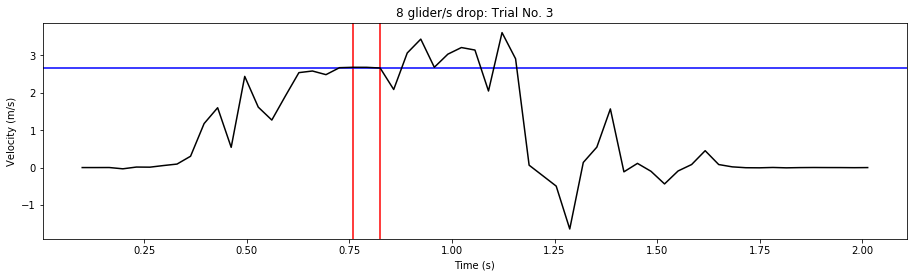

The terminal velocity is 2.68±0.00336m/s


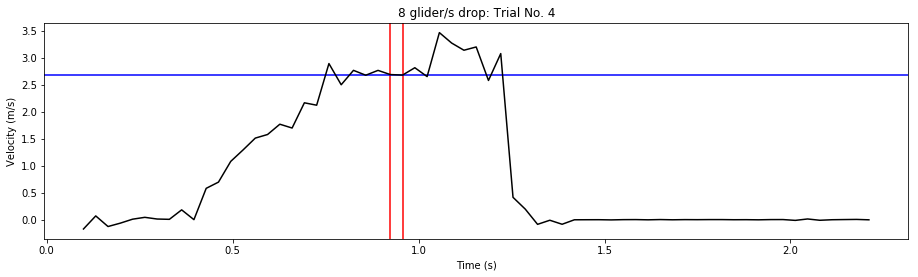

The terminal velocity is 2.69±0.00257m/s


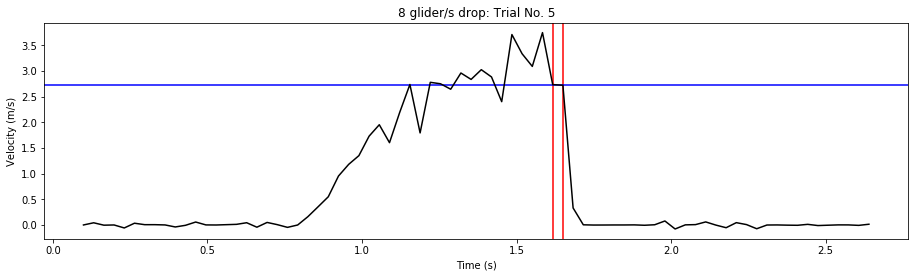

The terminal velocity is 2.73±0.00343m/s


In [6]:
for a in range(5): print(average_terminal_velocity(position[3][a], time[3][a], 8, a+1))

### 16 gliders data analysis

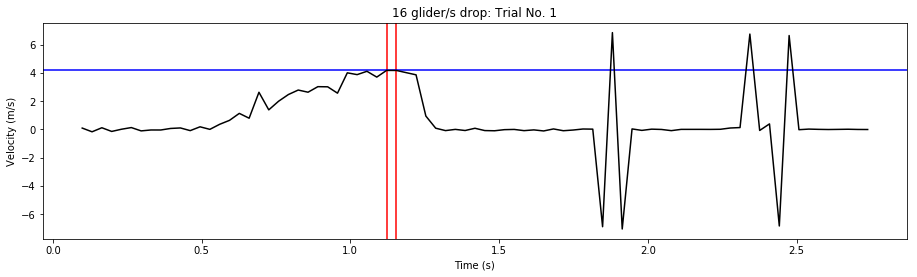

The terminal velocity is 4.17±0.000718m/s


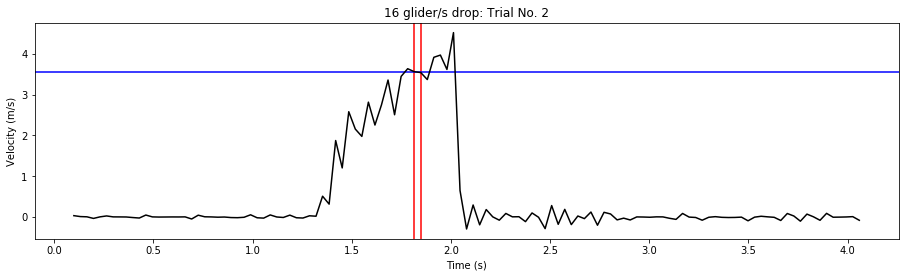

The terminal velocity is 3.55±0.00598m/s


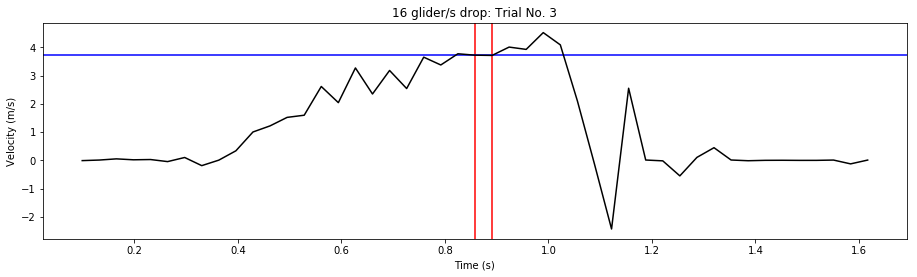

The terminal velocity is 3.72±0.00242m/s


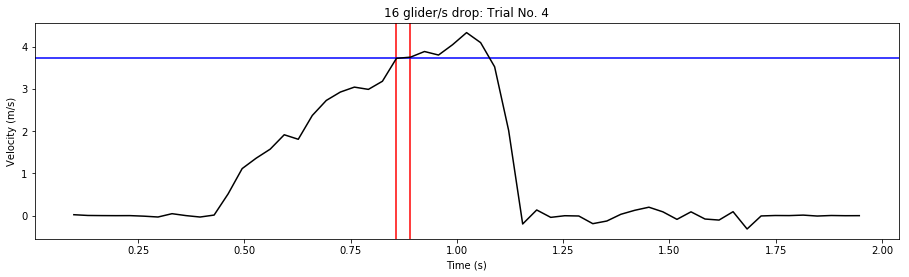

The terminal velocity is 3.73±0.0077m/s


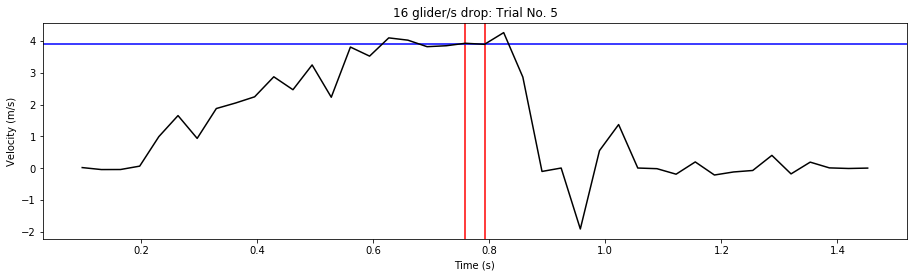

The terminal velocity is 3.9±0.00883m/s


In [7]:
for a in range(5): print(average_terminal_velocity(position[4][a], time[4][a], 16, a+1))

In [8]:
v_terminal = [[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]
standard_deviation = []
SEM = []
for a in range(5):
    #create array with the terminal velocities
    for b in range(5): v_terminal[a][b] = v_terminal_values(position[a][b], time[a][b])
    #calculate the SEM
    standard_deviation.append(np.std(v_terminal[a]))
    SEM.append(standard_deviation[a]/(len(v_terminal))**0.5)

msg = 'The average terminal velocity for {} glider/s is {:.2g}±{:.2g} to 2 significant figures'
for a in range(5): print(msg.format(2**a, average(v_terminal[a]), SEM[a]))

The average terminal velocity for 1 glider/s is 1.1±0.03 to 2 significant figures
The average terminal velocity for 2 glider/s is 1.5±0.024 to 2 significant figures
The average terminal velocity for 4 glider/s is 2.2±0.043 to 2 significant figures
The average terminal velocity for 8 glider/s is 2.8±0.12 to 2 significant figures
The average terminal velocity for 16 glider/s is 3.8±0.093 to 2 significant figures


For 1.1 see the heading '1 glider data analysis'


For individual SEM use individual_SEM function in conjuction with the formula


$$E_{n+1} = \sqrt{\sum_{i}^{n} E_{i}^2}$$

See this below

In [9]:
per_trial_SEM = [[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]

for a in range(5): 
    for b in range(5):
        per_trial_SEM[a][b] = individual_SEM(position[a][b], time[a][b])

individual_SEM_result = []
for a in range(5): individual_SEM_result.append(0)

for a in range(5): individual_SEM_result[a] = (sum((per_trial_SEM[a][c])**2 for c in range(5)))**0.5
msg_1 = 'Individual SEM for {} glider/s was {:.4g} and the Overall SEM was {:.4g} meaning the overall was {:.2g} times greater'

average_SEM_difference = []
for a in range(5):
    print(msg_1.format(2**(a), individual_SEM_result[a], SEM[a], SEM[a]/individual_SEM_result[a]))
    average_SEM_difference.append(SEM[a]/individual_SEM_result[a])

msg_2 = 'This resutls in the overall SEM being on average {:.2g} times greater than the individual SEM'
print(msg_2.format( average(average_SEM_difference)))

Individual SEM for 1 glider/s was 0.005101 and the Overall SEM was 0.03019 meaning the overall was 5.9 times greater
Individual SEM for 2 glider/s was 0.006026 and the Overall SEM was 0.02447 meaning the overall was 4.1 times greater
Individual SEM for 4 glider/s was 0.007461 and the Overall SEM was 0.04331 meaning the overall was 5.8 times greater
Individual SEM for 8 glider/s was 0.009242 and the Overall SEM was 0.1162 meaning the overall was 13 times greater
Individual SEM for 16 glider/s was 0.0134 and the Overall SEM was 0.09337 meaning the overall was 7 times greater
This resutls in the overall SEM being on average 7.1 times greater than the individual SEM


## Terminal Velocity vs Mass

Logbook 2.3 and Logbook 2.6

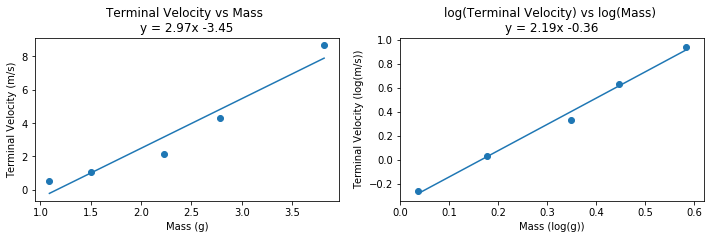

In [10]:
vt_avg = []
for a in range(5):
    vt_avg.append(average(v_terminal[a]))
    
mass = [0.55, 1.07, 2.15, 4.29, 8.66]
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.scatter(np.array(vt_avg), np.array(mass))
x = np.array(vt_avg)
y = np.array(mass)
m, b = np.polyfit(x, y, 1)
ax1.plot(x, m*x + b)
ax1.set_title('Terminal Velocity vs Mass \n' + 'y = {:.2f}x {:.2f}'.format(m, b))
ax1.set_xlabel('Mass (g)')
ax1.set_ylabel('Terminal Velocity (m/s)')

ax2.scatter(np.array(np.log10(vt_avg)), np.array(np.log10(mass)))
x = np.array(np.log10(vt_avg))
y = np.array(np.log10(mass))
m, b = np.polyfit(x, y, 1)
ax2.plot(x, m*x + b)
ax2.set_title('log(Terminal Velocity) vs log(Mass) \n' + 'y = {:.2f}x {:.2f}'.format(m, b))
ax2.set_xlabel('Mass (log(g))')
ax2.set_ylabel('Terminal Velocity (log(m/s))')
plt.show()